# Activities 17 & 18
## Data Science, Deep Learning, & Machine Learning with Python
### Arash Nouri
### 100 was an arbitrarily chosen cutoff. Try different values - what effect does it have on the end results?

Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading data

In [2]:
ratings = pd.read_csv( 'u.data', sep='\t', names = [ 'user_id', 'movie_id', 'rating' ], usecols = range( 3 ), 
                      encoding = "ISO-8859-1" )

movies = pd.read_csv( 'u.item', sep='|', names = [ 'movie_id', 'title' ], usecols = range( 2 ), 
                     encoding = "ISO-8859-1")

ratings = pd.merge( movies, ratings )

ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


Pivot data

In [3]:
movieRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
movieRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Users who rated Star Wars

In [4]:
starWarsRatings = movieRatings[ 'Star Wars (1977)' ]
starWarsRatings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

Calculate pairwise correlation of Star Wars' vector of user rating with every other movie

In [5]:
similarMovies = movieRatings.corrwith( starWarsRatings )
similarMovies.head()

/Users/Arash/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Arash/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

Drop *NaN*s

In [6]:
similarMovies = similarMovies.dropna()
similarMovies.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

Sorting the results by their similarities

In [7]:
similarMovies.sort_values( ascending  = False).head()

title
Hollow Reed (1996)        1.0
Man of the Year (1995)    1.0
Star Wars (1977)          1.0
Stripes (1981)            1.0
Full Speed (1996)         1.0
dtype: float64

Deciding about a proper cut-off number for number of review

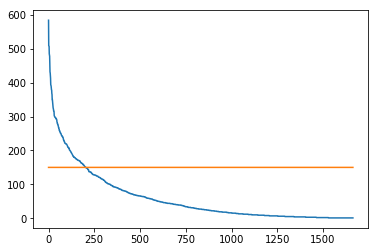

In [8]:
n_rev = ratings.groupby('title').agg(np.size)
plt.figure()
n = n_rev['rating'].sort_values(ascending  = False)
plt.plot(np.arange(0,len(n)), n )
plt.plot(150*np.ones(len(np.arange(0,len(n)))))

Based on the plot, movies with reviews over 150 are acceptale

In [9]:
considered_movies = n_rev['rating'] >= 150
p_movie = n[considered_movies]
p_movie.head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

Chosing movies with acceptable number of ratings

In [10]:
p_movie = pd.DataFrame(p_movie)
df = p_movie.join(pd.DataFrame(similarMovies, columns=['similarity']))
df.head()

,rating,similarity
title,,
Star Wars (1977),584,1.000000
Contact (1997),509,0.134962
Fargo (1996),508,0.044415
Return of the Jedi (1983),507,0.672556
Liar Liar (1997),485,0.150292


In [11]:
Recomendations are

SyntaxError: invalid syntax (<ipython-input-11-7d76f02befa8>, line 1)

In [12]:
df.sort_values(['similarity'], ascending=False)[:15]

,rating,similarity
title,,
Star Wars (1977),584,1.000000
"Empire Strikes Back, The (1980)",368,0.748353
Return of the Jedi (1983),507,0.672556
Raiders of the Lost Ark (1981),420,0.536117
"Sting, The (1973)",241,0.367538
Indiana Jones and the Last Crusade (1989),331,0.350107
L.A. Confidential (1997),297,0.319065
"Bridge on the River Kwai, The (1957)",165,0.316580
E.T. the Extra-Terrestrial (1982),300,0.303619
